In [29]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

h = 0.6711

def Seed_crit_BH (snapshot_file, fof_file, label):
    with h5py.File(snapshot_file, "r") as data, \
    h5py.File(fof_file, "r") as f:

        total_bh_mass = f["Subhalo/SubhaloMass"][:] * 1e10 / h
        redshift = data["Header"].attrs["Redshift"]

        
        G = 6.67e-27
        Mp = 1.672e-27
        c = 3e8
        Thomson_cross_section = 6.6e-27
        Ledd = (4 * np.pi * G * total_bh_mass * Mp * c)/Thomson_cross_section

        epsilon = 1e-12
        
        if(label == "SIMBA"):
            epsilon = 0.1
            
        if(label == "TNG"):
            epsilon = 0.2

        Medd = Ledd/(epsilon * c * c)

        subhalo_stellar_masses = f["Subhalo/SubhaloMassType"][:, 4] * 1e10 / h 

        plt.scatter(subhalo_stellar_masses, Medd, s = 5, alpha=0.8, label=f"{label}")
        
        plt.xlabel("Subhalo Stellar Mass (Msun)")
        plt.ylabel("Eddington Mass (Msun)")
        plt.title(f"Stellar Mass vs Eddington Mass, z={redshift}")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()


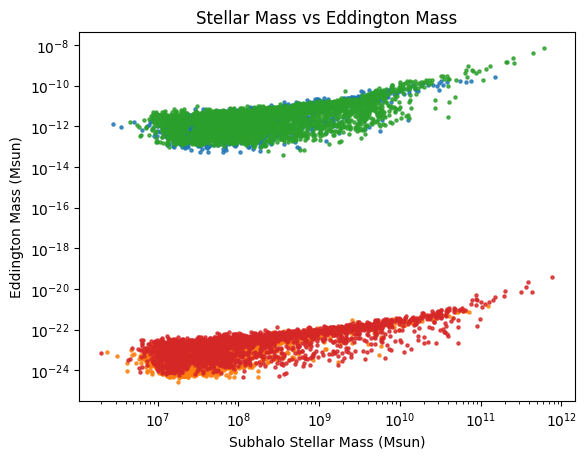

In [ ]:
snap_simba_z3 = "data/Output-simba/snap_004.hdf5"
fof_simba_z3  = "data/Output-simba/fof_subhalo_tab_004.hdf5"
snap_tng_z3   = "data/Output-fidTNG/snap_004.hdf5"
fof_tng_z3    = "data/Output-fidTNG/fof_subhalo_tab_004.hdf5"

snap_simba_z0 = "data/Output-simba/snap_032.hdf5" 
fof_simba_z0  = "data/Output-simba/fof_subhalo_tab_032.hdf5"
snap_tng_z0   = "data/Output-fidTNG/snap_032.hdf5"
fof_tng_z0    = "data/Output-fidTNG/fof_subhalo_tab_032.hdf5"


Seed_crit_BH(
    snapshot_file="data/Output-simba/snap_004.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_004.hdf5",
    label="Simba"
)

Seed_crit_BH(
    snapshot_file="data/Output-fidTNG/snap_004.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_004.hdf5",
    label="TNG"
)

plt.show()


Seed_crit_BH(
    snapshot_file="data/Output-simba/snap_032.hdf5",
    fof_file="data/Output-simba/fof_subhalo_tab_032.hdf5",
    label="Simba"
)

Seed_crit_BH(
    snapshot_file="data/Output-fidTNG/snap_032.hdf5",
    fof_file="data/Output-fidTNG/fof_subhalo_tab_032.hdf5",
    label="TNG"
)